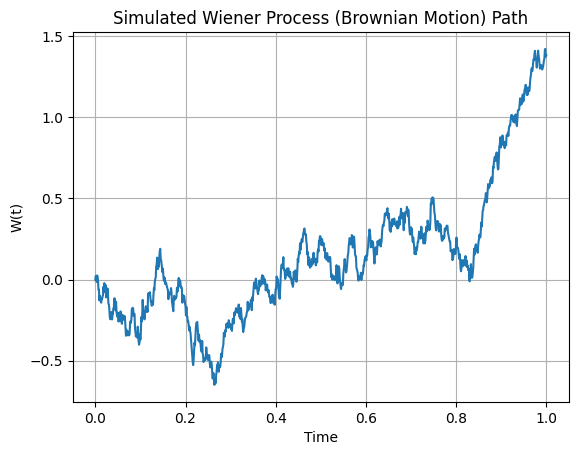

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Setting up the total time and number of steps
T = 1.0
N = 1000
dt = T / N

# Creating the time grid
time_points = np.linspace(0, T, N + 1)

# nitializing Wiener process path with 0 at t=0
W = np.zeros(N + 1)

# Simulating the Brownian motion path
for i in range(1, N + 1):
    # random sample from N(0, 1)
    z = np.random.normal(0, 1)
    W[i] = W[i - 1] + np.sqrt(dt) * z

plt.plot(time_points, W)
plt.title("Simulated Wiener Process (Brownian Motion) Path")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.grid(True)
plt.show()

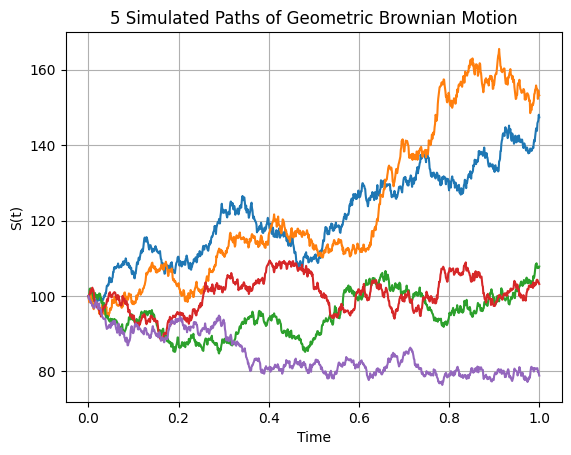

In [29]:
import numpy as np
import matplotlib.pyplot as plt

T = 1.0
N = 1000
dt = T / N
time_grid = np.linspace(0, T, N + 1)

# GBM parameters
S0 = 100
alpha = 0.1
sigma = 0.2
num_paths = 5

# Simulating GBM paths
all_paths = []

for path in range(num_paths):
    W = np.zeros(N + 1)  # Brownian path starts at 0
    S = np.zeros(N + 1)  # GBM path
    S[0] = S0

    for i in range(1, N + 1):
        z = np.random.normal(0, 1)           # Standard normal random variable
        W[i] = W[i - 1] + np.sqrt(dt) * z
        exponent = sigma * W[i] + (alpha - 0.5 * sigma**2) * time_grid[i]
        S[i] = S0 * np.exp(exponent)

    all_paths.append(S)

# Step 3: Plotting the 5 paths
for path in all_paths:
    plt.plot(time_grid, path)

plt.title("5 Simulated Paths of Geometric Brownian Motion")
plt.xlabel("Time")
plt.ylabel("S(t)")
plt.grid(True)
plt.show()


In [34]:
import numpy as np

# Parameters
T = 1.0
N = 1000
dt = T / N
num_simulations = 10000

# s and t values
s_index = int(0.4 * N)
t_index = int(0.7 * N)
s_time = s_index * dt
t_time = t_index * dt

product_sum = 0.0

for _ in range(num_simulations):
    W = np.zeros(N + 1)
    for i in range(1, N + 1):
        z = np.random.normal(0, 1)
        W[i] = W[i - 1] + np.sqrt(dt) * z

    product_sum += W[s_index] * W[t_index]

expected_product = product_sum / num_simulations
print(f"E[W(s)W(t)] = {expected_product:.4f}, min(s,t) = {min(s_time, t_time):.4f}")
# We get approximately same

E[W(s)W(t)] = 0.4126, min(s,t) = 0.4000


In [35]:
import numpy as np

T = 2.0
N = 2000
dt = T / N
num_simulations = 10000

# Interval definitions
t1_index = int(0.2 * N)
t2_index = int(0.4 * N)
t3_index = int(0.6 * N)
t4_index = int(0.8 * N)

increments_A = []
increments_B = []

for _ in range(num_simulations):
    W = np.zeros(N + 1)
    for i in range(1, N + 1):
        W[i] = W[i - 1] + np.random.normal(0, np.sqrt(dt))

    A = W[t2_index] - W[t1_index]
    B = W[t4_index] - W[t3_index]

    increments_A.append(A)
    increments_B.append(B)

# Compute correlation between non-overlapping increments
# If correlation of them is zero then they are independent
correlation = np.corrcoef(increments_A, increments_B)[0, 1]
print(f"Correlation between non-overlapping increments = {correlation:.5f}")
# We get correlation is zero


Correlation between non-overlapping increments = 0.00847
